# Visualising the Lorentz Tranformation

In this notebook we want to look at the basics of the Lorentz transformation. To do this we will look at how position four vectors change as we change reference frames. Recall that the position four vector is defined as: 
$$v= \begin{pmatrix} c t \\ x \\ y \\ z \end{pmatrix} $$
while the Lorentz transformation $L(u)$ for a boost in the $x$ direction can be written as 
$$ L(u)=\begin{pmatrix} \gamma & -\gamma \frac{u}{c} & 0 & 0 \\
             -\gamma \frac{u}{c} & \gamma & 0 & 0 \\
             0 & 0 & 1 & 0 \\
             0 & 0 & 0 & 1 \end{pmatrix}
$$
where 
$$\gamma =\frac{1}{\sqrt{1- u^2}}$$ and $u$ is the velocity of the new frame.

Now to make things simpler to visualise we will ignore the $y$ and $z$ directions and
choose units of time so that $c=1$. The equations above then become:
$$ v =\begin{pmatrix}  t \\ x \end{pmatrix} \quad {\rm and} \quad
    L(u)=\begin{pmatrix} \gamma & -\gamma u \\ -\gamma u & \gamma \end{pmatrix}
$$

To go from one reference frame to another we simple calculate $L(u) v$. This gives:
$$ \begin{pmatrix}  t' \\ x' \end{pmatrix} =
\begin{pmatrix} \gamma & -\gamma u \\ -\gamma u & \gamma \end{pmatrix} \begin{pmatrix}  t \\ x \end{pmatrix}
$$
or 
$$ t'=\gamma (t - u x) \quad {\rm and} x'=\gamma(x-u t) $$

Thus we can see that the mathematics of special relativity is trival. It is just multiplying a vector by a matrix. It is the consquences that are profund and counter-interative. Which is what we want to focus on here.

## Space-Time

Space-time is the playground where we will explore the effects of relativity. The convention is to plot space-time with time going along the vertical axis. To see how this works we start with the usual Python libraries.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
time=np.linspace(-6,20,100)
space=np.linspace(-20,20,100)
line1=np.linspace(-20,20,100)
line2=np.linspace(20,-20,100)
line3=np.zeros(11)
line4=np.linspace(0,10,11)
line5=np.zeros(len(line3))
line6=np.zeros(len(line3))

from modules import lorentz as lz
from modules.lorentz import lorentz

%load_ext autoreload
%autoreload

Now we plot empty space:

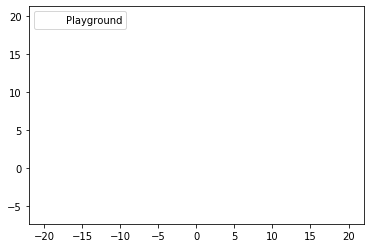

In [2]:
lz.plot_empty_space()

Note much is going on there since it is just empty space. The next thing is to add a couple of lines that describe the speed of light. This is the light cone for an object at the origin.

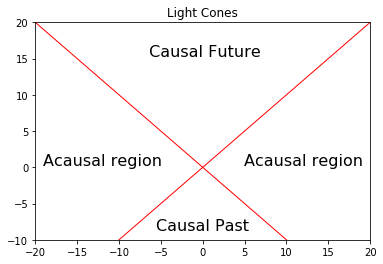

In [3]:
lz.plot_light_cones()

Now as causality still applies in all reference frames the Lorentz transformation cannot move an object from one region (bound by red lines above) to another. We can now see what happens to different events when we view them from different reference frames.

### The origin

The first point to consider is the origin. The is the space-time event:
$$\begin{pmatrix} 0 \\ 0 \end{pmatrix} $$
which transforms as
$$ 
\begin{pmatrix} \gamma & -\gamma u \\ -\gamma u & \gamma \end{pmatrix} \begin{pmatrix}  0 \\ 0 \end{pmatrix} \quad = \quad \begin{pmatrix} 0 \\ 0 \end{pmatrix} 
$$

So the origin is the same for all reference frames irrespective of their velocity. We can plot this easily enough


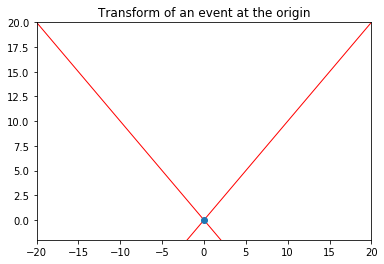

In [4]:
lz.plot_event_at_origin()

### Transform of pure time like events.

Suppose now we built a light house at $x=0$ and set it to flash once a hour. If we are standing at $x=0$ we will observe a sequence of events:
$$\begin{pmatrix} 0 \\ 0 \end{pmatrix}, \quad \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad
\begin{pmatrix} 2 \\ 0 \end{pmatrix}, \quad \begin{pmatrix} 3 \\ 0 \end{pmatrix} ...
$$
Which we can plot as:

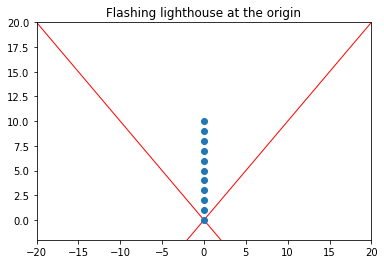

In [5]:
lz.plot_flashing_lighthouse()

So next we want to know what an observer moving at a different velocity will measure. This 
means calculating:
Suppose now we built a light house at $x=$ and set it to flash once a hour. If we are standing at $x=0$ we will observe a sequence of events:
$$\begin{pmatrix} \gamma & -\gamma u \\ -\gamma u & \gamma \end{pmatrix} \begin{pmatrix} 0 \\ 0 \end{pmatrix}, \quad \begin{pmatrix} \gamma & -\gamma u \\ -\gamma u & \gamma \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad
\begin{pmatrix} \gamma & -\gamma u \\ -\gamma u & \gamma \end{pmatrix} \begin{pmatrix} 2 \\ 0 \end{pmatrix}, \quad ...
$$
For a fixed velocity $v$.

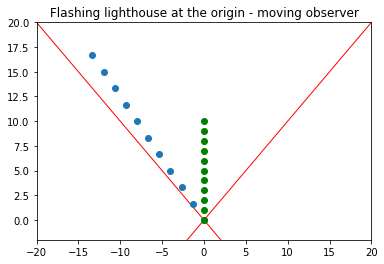

In [6]:
lz.plot_lighthouse_transform()

In [17]:
from ipywidgets import interactive, FloatSlider
%matplotlib inline

In [18]:
def f(u):
    plt.figure(6,figsize=[12.0, 9.0])
    for ii in range(len(line3)):
        point=np.array([line4[ii],line3[ii]])  #remember that time is the first element.
        point=np.dot(lz.lorentz(u),point)   #dot does matrix multiplication
        line5[ii]=point[0]
        line6[ii]=point[1]
    plt.plot(space,line1,linewidth=1,color='red')
    plt.plot(space,line2,linewidth=1,color='red')
    plt.xlim(-20,20)
    plt.ylim(-2,20)
    plt.plot(line6, line5, 'o')
    plt.plot(line3, line4, 'o',color='green')
    plt.title('Flashing lighthouse at the origin - moving observer')
    plt.show()
    
interactive_plot = interactive(f, u=FloatSlider(min=-0.999, max=0.999, step=1e-4, continuous_update=False))
output = interactive_plot.children[-1]
output.layout.height = '650px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='u', max=0.999, min=-0.999, …

In the graph above you can adjust the relative velocty from $-1<u<1$. As you change the value of the velocity you can see the dots move away from the origin and also to go to greater times. This is the effect of time dilation that we have learnt about in class.

We can see what happens to each point using the Lorentz transform. Starting with the event at time $t$ this gets transformed to:
$$\begin{pmatrix} \gamma & -\gamma u \\ -\gamma u & \gamma \end{pmatrix} 
\begin{pmatrix} t \\ 0 \end{pmatrix} \quad = \quad 
\begin{pmatrix} \gamma t \\ -\gamma u \end{pmatrix} \quad =
\begin{pmatrix} \frac{t}{\sqrt{1-u^2/c^2}} \\ -\frac{u t}{\sqrt{1-u^2/c^2}} \end{pmatrix} 
$$
where I have re-introduced $c$ to make it clear the effects of the speed of light. We can plot these as curves defined by $t(u)$ and $x(u)$. These are hyperbolae as we can see before.

In [19]:
velocities=np.linspace(-0.999,0.999,2001)

ln1=np.zeros((len(velocities),2))
ln2=np.zeros((len(velocities),2))
ln3=np.zeros((len(velocities),2))
ln4=np.zeros((len(velocities),2))
ln5=np.zeros((len(velocities),2))
ln6=np.zeros((len(velocities),2))
ln7=np.zeros((len(velocities),2))
ln8=np.zeros((len(velocities),2))
ln9=np.zeros((len(velocities),2))
ln10=np.zeros((len(velocities),2))

for ii in range(len(velocities)):
    vel=velocities[ii]
    gamma=1.0/np.sqrt(1.0-vel*vel)
    ln1[ii]=np.dot(lorentz(vel),np.array([1,0]))
    ln2[ii]=np.dot(lorentz(vel),np.array([2,0]))
    ln3[ii]=np.dot(lorentz(vel),np.array([3,0]))
    ln4[ii]=np.dot(lorentz(vel),np.array([4,0]))
    ln5[ii]=np.dot(lorentz(vel),np.array([5,0]))
    ln6[ii]=np.dot(lorentz(vel),np.array([6,0]))
    ln7[ii]=np.dot(lorentz(vel),np.array([7,0]))
    ln8[ii]=np.dot(lorentz(vel),np.array([8,0]))
    ln9[ii]=np.dot(lorentz(vel),np.array([9,0]))
    ln10[ii]=np.dot(lorentz(vel),np.array([10,0]))
    

    
def f2(u):
    plt.figure(7,figsize=[12.0, 9.0])
    plt.plot(space,line1,linewidth=1,color='red')
    plt.plot(space,line2,linewidth=1,color='red')
    plt.plot(ln1[:,1],ln1[:,0],linewidth=1,color='black')
    plt.plot(ln2[:,1],ln2[:,0],linewidth=1,color='black')
    plt.plot(ln3[:,1],ln3[:,0],linewidth=1,color='black')
    plt.plot(ln4[:,1],ln4[:,0],linewidth=1,color='black')
    plt.plot(ln5[:,1],ln5[:,0],linewidth=1,color='black')
    plt.plot(ln6[:,1],ln6[:,0],linewidth=1,color='black')
    plt.plot(ln7[:,1],ln7[:,0],linewidth=1,color='black')
    plt.plot(ln8[:,1],ln8[:,0],linewidth=1,color='black')
    plt.plot(ln9[:,1],ln9[:,0],linewidth=1,color='black')
    plt.plot(ln10[:,1],ln10[:,0],linewidth=1,color='black')
    plt.xlim(-20,20)
    plt.ylim(-2,20)

    for ii in range(len(line3)):
        point=np.array([line4[ii],line3[ii]])  #remember that time is the first element.
        point=np.dot(lorentz(u),point)   #dot does matrix multiplication
        line5[ii]=point[0]
        line6[ii]=point[1]
    plt.plot(line6, line5, 'o')
    plt.plot(line3, line4, 'o',color='green')
    plt.title('Flashing lighthouse at the origin - moving observer')
    plt.show()

interactive_plot = interactive(f2, u=FloatSlider(min=-0.999, max=0.999, step=1e-4, continuous_update=False))
output = interactive_plot.children[-1]
output.layout.height = '650px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='u', max=0.999, min=-0.999, …

In the plot above we can now see that as expected the points move along the curves we calculated. And again the effects of time dilation are obvious.

## Length Contraction

Suppose now we built a second light house at $x=1$ and set it to flash once a hour exactly in sync with the one at $x=0$. If we are standing at $x=0$ we will observe a sequence of events:
$$\begin{pmatrix} 0 \\ 0 \end{pmatrix}, \quad \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad
\begin{pmatrix} 2 \\ 0 \end{pmatrix}, \quad \begin{pmatrix} 3 \\ 0 \end{pmatrix} ...
$$
from the original lighthouse and from the second we will observe:
$$\begin{pmatrix} 0 \\ 1 \end{pmatrix}, \quad \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \quad
\begin{pmatrix} 2 \\ 1 \end{pmatrix}, \quad \begin{pmatrix} 3 \\ 1 \end{pmatrix} ...
$$

Note that this when and where the events happen in space-time not when an observer located somewhere in space-time will see them. 
Which we can plot these events as before:

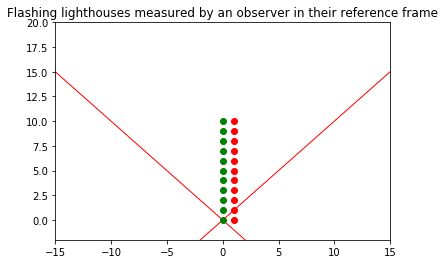

In [20]:
line1=np.linspace(-20,20,100)
line2=np.linspace(20,-20,100)
plt.figure(8)
plt.plot(space,line1,linewidth=1,color='red')
plt.plot(space,line2,linewidth=1,color='red')
plt.xlim(-15,15)
plt.ylim(-2,20)
line3=np.zeros(11)
line4=np.linspace(0,10,11)
plt.plot(line3, line4, 'o',color='green')
plt.plot(line3+1, line4, 'o',color='red')

plt.title('Flashing lighthouses measured by an observer in their reference frame')
plt.show()

Now as before we look at what happens when we transform to a frame moving at a velocity $u$ relative to the original one.

In [23]:
line5=np.zeros(11)
line6=np.zeros(11)
line7=np.zeros(11)
line8=np.zeros(11)

def f3(u):
    plt.figure(9,figsize=[12.0, 9.0])
    plt.plot(space,line1,linewidth=1,color='red')
    plt.plot(space,line2,linewidth=1,color='red')
    plt.plot(ln1[:,1],ln1[:,0],linewidth=1,color='black')
    plt.plot(ln2[:,1],ln2[:,0],linewidth=1,color='black')
    plt.plot(ln3[:,1],ln3[:,0],linewidth=1,color='black')
    plt.plot(ln4[:,1],ln4[:,0],linewidth=1,color='black')
    plt.plot(ln5[:,1],ln5[:,0],linewidth=1,color='black')
    plt.plot(ln6[:,1],ln6[:,0],linewidth=1,color='black')
    plt.plot(ln7[:,1],ln7[:,0],linewidth=1,color='black')
    plt.plot(ln8[:,1],ln8[:,0],linewidth=1,color='black')
    plt.plot(ln9[:,1],ln9[:,0],linewidth=1,color='black')
    plt.plot(ln10[:,1],ln10[:,0],linewidth=1,color='black')
    plt.xlim(-15,15)
    plt.ylim(-2,20)

    for ii in range(len(line3)):
        point=np.array([line4[ii],line3[ii]])  #remember that time is the first element.
        point=np.dot(lorentz(u),point)   #dot does matrix multiplication
        point2=np.array([line4[ii],line3[ii]+1])  #remember that time is the first element.
        point2=np.dot(lorentz(u),point2)   #dot does matrix multiplication
        line5[ii]=point[0]
        line6[ii]=point[1]
        line7[ii]=point2[0]
        line8[ii]=point2[1]
        
    plt.plot(line6, line5, 'o-')
    plt.plot(line8, line7, 'o-',color='black')
    plt.plot(line3, line4, 'o-',color='green')
    plt.plot(line3+1, line4, 'o-',color='red')
    plt.title('Flashing lighthouse at the origin - moving observer')
    plt.show()

interactive_plot = interactive(f3, u=FloatSlider(min=-0.999, max=0.999, step=1e-4, continuous_update=False))
output = interactive_plot.children[-1]
output.layout.height = '650px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='u', max=0.999, min=-0.999, …

Here again length contraction can be clearly seen. It is also clear that while the events occur at the same time in the first reference frame they do not occur at the same time in any other reference frame.

In [ ]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()